**재형님 요청사항**  
- 리트리버 set_5, set_8과 동일한 방식으로 웰시코기에도 적용해주길 요청받음


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os, sys, json, cv2
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

import shutil

## 노이즈 제거

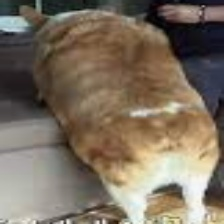

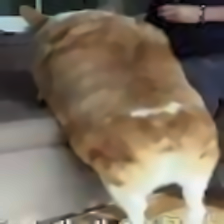

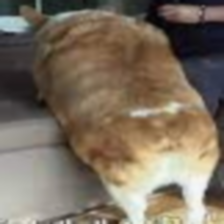

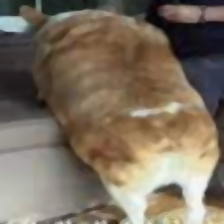

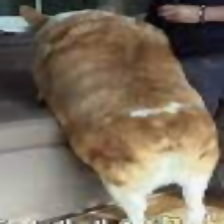

In [50]:
img = cv2.imread(f"/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/전처리 이미지(학습용)/웰시코기/웰시코기_비만/1 (104).jpg")

denoised_img1 = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 5, 10) # NLmeans
denoised_img2 = cv2.GaussianBlur(img, (5, 5), 0) # Gaussian
denoised_img3 = cv2.medianBlur(img, 5) # Median
denoised_img4 = cv2.bilateralFilter(img, 5, 50, 50) # Bilateral
 
cv2_imshow(img)
cv2_imshow(denoised_img1)   # after(NLmeans)
cv2_imshow(denoised_img2)   # after(Gaussian)
cv2_imshow(denoised_img3)   # after(Median)
cv2_imshow(denoised_img4)   # after(Bilateral)
 
cv2.waitKey(0)
cv2.destroyAllWindows()

## canny edge 추출

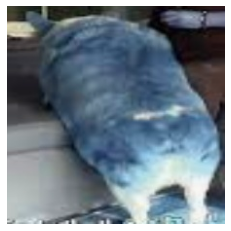

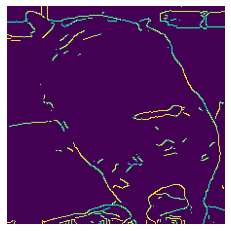

In [51]:
img = cv2.imread(f"/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/전처리 이미지(학습용)/웰시코기/웰시코기_비만/1 (104).jpg")
edges = cv2.Canny(img, 1, 1)
plt.imshow(img), plt.axis("off") # 이미지 출력
plt.show()
# plt.imshow(edges), plt.axis("off") # 이미지 출력
# plt.show()

edges1 = cv2.Canny(denoised_img1, 100, 100) 
plt.imshow(edges1), plt.axis("off") # 이미지 출력
plt.show()

## set_5 적용


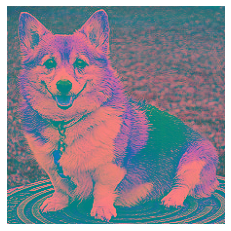

In [4]:
#### 모든 이미지에 적용 전 테스트
image = cv2.imread(f"/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/전처리 이미지(학습용)/웰시코기/웰시코기_정상/00.jpg") 
kernel = np.array([[0, -1, 0],
                [-1, 5,-1],
                [0, -1, 0]]) # 커널 생성
# 이미지를 선명하게 만듦
image_sharp = cv2.filter2D(image, -1, kernel)
image_yuv = cv2.cvtColor(image_sharp, cv2.COLOR_BGR2YUV) # YUV로 변경
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0]) # 히스토그램 평활화 적용
plt.imshow(image_yuv), plt.axis("off") # 이미지 출력
plt.show()

In [3]:
#### 모든 이미지에 적용
def square_sharp_contrast(name, file_path, save_path):
  file = os.listdir(file_path)

  i = 0
  for img_name in file:
    image = cv2.imread(f"{file_path}/{img_name}") 
    kernel = np.array([[0, -1, 0],
                    [-1, 5,-1],
                    [0, -1, 0]]) # 커널 생성
    # 이미지를 선명하게 만듦
    image_sharp = cv2.filter2D(image, -1, kernel)
    image_yuv = cv2.cvtColor(image_sharp, cv2.COLOR_BGR2YUV) # YUV로 변경
    image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0]) # 히스토그램 평활화 적용
    # save
    i+=1
    cv2.imwrite(f'{save_path}/square_sharp_contrast_{i}.jpg',image_yuv)

## 정상
name = 'nor'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/전처리 이미지(학습용)/웰시코기/웰시코기_정상'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/전처리 이미지(학습용)/웰시코기/set_5/전처리_정상'
square_sharp_contrast(name,file_path, save_path)

## 비만
name = 'fat'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/전처리 이미지(학습용)/웰시코기/웰시코기_비만'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/전처리 이미지(학습용)/웰시코기/set_5/전처리_비만'
square_sharp_contrast(name,file_path, save_path)

## set_8 적용

In [ ]:
import os, sys, json, cv2
import pandas as pd
import numpy as np

# trim 함수  (정방형으로 잘라오기)
def trim_images(name, file_path, save_path):
    i = 1
    for img_name in os.listdir(file_path):
        image = cv2.imread(f'{file_path}/{img_name}')

        # width & height of a image
        h, w = image.shape[0], image.shape[1]
        # The center of a image
        X, Y = int(w/2), int(h/2)

        # 폭 > 높이 : 가로 방향
        if w > h:
            # slice
            img_trim = image[ : ,  X-int(h/2) : X+int(h/2)  ]

        # 폭 < 높이 : 세로 방향
        elif w < h:
            # slice
            img_trim = image[  Y-int(w/2) : Y+int(w/2)  , : ]

        # 폭 = 높이 : 정방형
        else:
            img_trim = image

        cv2.imwrite(f'{save_path}/square_{name}_{i}.jpg',img_trim)
        i += 1

# # 정상
name = 'nor'
nor_file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/전처리 이미지(학습용)/웰시코기/웰시코기_정상'
nor_save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/이미지전처리/Welsh Corgi_square/nor'
trim_images(name, nor_file_path, nor_save_path)

# 비만
name = 'fat'
fat_file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/전처리 이미지(학습용)/웰시코기/웰시코기_비만'
fat_save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/이미지전처리/Welsh Corgi_square/fat'
trim_images(name, fat_file_path, fat_save_path)

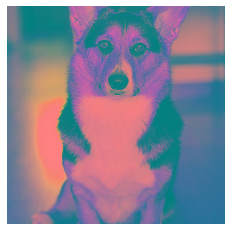

In [ ]:
##### 모든 이미지에 적용하기 전 test
image = cv2.imread(f"/content/drive/MyDrive/멀티캠퍼스/3조/이경희/이미지전처리/Welsh Corgi_square/nor/square_nor_1.jpg") 
kernel = np.array([[0, -1, 0],
                [-1, 5,-1],
                [0, -1, 0]]) # 커널 생성
# 이미지를 선명하게 만듦
image_sharp = cv2.filter2D(image, -1, kernel)
image_yuv = cv2.cvtColor(image_sharp, cv2.COLOR_BGR2YUV) # YUV로 변경
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0]) # 히스토그램 평활화 적용
plt.imshow(image_yuv), plt.axis("off") # 이미지 출력
plt.show()

In [4]:
#### 모든 이미지에 적용
def square_sharp_contrast(name, file_path, save_path):
  file = os.listdir(file_path)

  i = 0
  for img_name in file:
    image = cv2.imread(f"{file_path}/{img_name}") 
    kernel = np.array([[0, -1, 0],
                    [-1, 5,-1],
                    [0, -1, 0]]) # 커널 생성
    # 이미지를 선명하게 만듦
    image_sharp = cv2.filter2D(image, -1, kernel)
    image_yuv = cv2.cvtColor(image_sharp, cv2.COLOR_BGR2YUV) # YUV로 변경
    image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0]) # 히스토그램 평활화 적용
    # save
    i+=1
    cv2.imwrite(f'{save_path}/square_sharp_contrast_{i}.jpg',image_yuv)

## 정상
name = 'nor'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/이미지전처리/Welsh Corgi_square/nor'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/전처리 이미지(학습용)/웰시코기/set_8/전처리_정상'
square_sharp_contrast(name,file_path, save_path)

## 비만
name = 'fat'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/이미지전처리/Welsh Corgi_square/fat'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/전처리 이미지(학습용)/웰시코기/set_8/전처리_비만'
square_sharp_contrast(name,file_path, save_path)

# train / validation / test 셋 분할

In [5]:
path = '/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/전처리 이미지(학습용)/웰시코기'
for folder_name in os.listdir(path):
  if folder_name in ['set_5', 'set_8'] :
    base_dir = f'{path}/{folder_name}'
    # # 훈련셋, 검증셋, 테스트셋을 미리 분할하기 위한 폴더 경로
    train_path = os.path.join(base_dir, 'train')
    os.mkdir( train_path )
    val_path = os.path.join(base_dir, 'validation')
    os.mkdir( val_path )
    test_path = os.path.join(base_dir, 'test')
    os.mkdir( test_path )


    # # train 정상 폴더
    train_nor_path = os.path.join(train_path, 'nor')
    os.mkdir( train_nor_path ) # 폴더 생성
    # # train 비만 폴더
    train_fat_path = os.path.join(train_path, 'fat')
    os.mkdir( train_fat_path )

    # # validation 정상 폴더
    val_nor_path = os.path.join(val_path, 'nor')
    os.mkdir( val_nor_path )
    # # validation 비만 폴더
    val_fat_path = os.path.join(val_path, 'fat')
    os.mkdir( val_fat_path )

    # # test 정상 폴더
    test_nor_path = os.path.join(test_path, 'nor')
    os.mkdir( test_nor_path )
    # # test 비만 폴더
    test_fat_path = os.path.join(test_path, 'fat')
    os.mkdir( test_fat_path )

    nor_path = f'{path}/{folder_name}/전처리_정상'
    nor_list = os.listdir(nor_path)
    fat_path = f'{path}/{folder_name}/전처리_비만'
    fat_list = os.listdir(fat_path)

    # -----------------------------------------------------------
    if folder_name == 'set_1' : file_name = 'sharp'
    elif folder_name == 'set_2' : file_name = 'GaussianBlur'
    elif folder_name == 'set_3' : file_name = 'Grayscale_sharp'
    elif folder_name == 'set_4' : file_name = 'Gray_GaussianBlur'
    elif folder_name == 'set_5' : file_name = 'sharp_contrast'
    elif folder_name == 'set_6' : file_name = 'div255'
    elif folder_name == 'set_7' : file_name = 'Gray_Gaussian_canny'
    elif folder_name == 'set_8' : file_name = 'square_sharp_contrast'

    # train용 이미지 복사
    for i in range(0, int(len(nor_list)*0.5)):
      src_path = os.path.join(nor_path, nor_list[i])                 # 원본 파일 경로
      dst_path = os.path.join(train_nor_path, f'{file_name}_nor_{i}.jpg')        # 복사할 파일 경로
      shutil.copyfile( src_path, dst_path )

    for i in range(0, int(len(fat_list)*0.5)):
      src_path = os.path.join(fat_path, fat_list[i])        
      dst_path = os.path.join(train_fat_path, f'{file_name}_fat_{i}.jpg')   
      shutil.copyfile( src_path, dst_path )

    # validation용 이미지 복사
    for i in range(int(len(nor_list)*0.5), int(len(nor_list)*0.75)):
      src_path = os.path.join(nor_path, nor_list[i])        
      dst_path = os.path.join(val_nor_path, f'{file_name}_nor_{i}.jpg')   
      shutil.copyfile( src_path, dst_path )

    for i in range(int(len(fat_list)*0.5), int(len(fat_list)*0.75)):
      src_path = os.path.join(fat_path, fat_list[i])        
      dst_path = os.path.join(val_fat_path, f'{file_name}_fat_{i}.jpg')   
      shutil.copyfile( src_path, dst_path )

    # test용 이미지 복사
    for i in range(int(len(nor_list)*0.75), len(nor_list)):
      src_path = os.path.join(nor_path, nor_list[i])        
      dst_path = os.path.join(test_nor_path, f'{file_name}_nor_{i}.jpg')   
      shutil.copyfile( src_path, dst_path )

    for i in range(int(len(fat_list)*0.75), len(fat_list)):
      src_path = os.path.join(fat_path, fat_list[i])        
      dst_path = os.path.join(test_fat_path, f'{file_name}_fat_{i}.jpg')   
      shutil.copyfile( src_path, dst_path )

In [6]:
# 잘 복사됐는지 확인
path = '/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/전처리 이미지(학습용)/웰시코기' 
for fn in os.listdir(path):
  if fn in ['set_5', 'set_8'] :
    nor_path = f'{path}/{fn}/전처리_정상'
    nor_list = os.listdir(nor_path)
    fat_path = f'{path}/{fn}/전처리_비만'
    fat_list = os.listdir(fat_path)

    ## train 정상 폴더
    train_nor_path = f'{path}/{fn}/train/nor'
    ## train 비만 폴더
    train_fat_path = f'{path}/{fn}/train/nor'

    ## validation 정상 폴더
    val_nor_path = f'{path}/{fn}/validation/fat'
    ## validation 비만 폴더
    val_fat_path = f'{path}/{fn}/validation/nor'

    ## test 정상 폴더
    test_nor_path = f'{path}/{fn}/test/nor'
    ## test 비만 폴더
    test_fat_path = f'{path}/{fn}/test/nor'

    print(f'--------------------------- {fn} ---------------------------')
    print(f'train set : {len(os.listdir(train_nor_path)) + len(os.listdir(train_fat_path))}')
    print(f'validation set : {len(os.listdir(val_nor_path)) + len(os.listdir(val_fat_path))}')
    print(f'test set : {len(os.listdir(test_nor_path)) + len(os.listdir(test_fat_path))}')
    print(f'total set : {len(nor_list) + len(fat_list)}')

--------------------------- set_5 ---------------------------
train set : 960
validation set : 325
test set : 482
total set : 1302
--------------------------- set_8 ---------------------------
train set : 1050
validation set : 349
test set : 526
total set : 1397
